# Alzheimer Disease Classification Decision Tree

# Import all the dependencies

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

Import the metrics class

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt

Import Doc2vec

In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import warnings

# Ignore Warnings

In [4]:
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# Read Data

In [5]:
#read in the preprocessed data as csv using pandas
df = pd.read_csv("preprocessed_data.csv")
df.head() #take a look

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [6]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])] #read the important identity
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [7]:
df_sub["data"].tolist() #collect all interview transcripts into a list

["  there's a cookie jar on the shelf . and the little boy's up on a stool . and the stool is about to fall he's about to fall . the stool's about to turn over . little girl in the picture's reaching for the cookie . mother is washing dishes . the water's running and running over onto the floor . she she has a plate in her hand and a towel . she's drying a plate . two cups are sitting on a counter and also a plate . you can see out through the kitchen window to another part of the house and a a walkway away from the house . you can see a window across in the other part of the house, the roof with a tree, that there are there are curtains on the windows .  I think that's did I cover it all ? yeah . ",
 " the kids are in the cookies . the stool is falling over . the mother's spilling the water and also drying the dishes . and the wind might be blowing the curtains . and the water's running . I can't tell is anything going on outside or not . I guess that's all I see . that's not very man

# Data Cleaning

In [8]:
#data cleaning
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]") #delete all puntuations
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)") #put space back in
NO_SPACE = ""
SPACE = " "

#data cleaning function
def preprocess_interviews(interviews):
    interviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in interviews]
    interviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in interviews]
    
    return interviews #return processed data

interviews_train_clean = preprocess_interviews(df_sub["data"].tolist()) #put all cleaned data in a list

In [9]:
interviews_train_clean[5] #take a look

' well the boy has climbed up on the stool to get some cookies from the cookie jar  and hes giving his sister the cookies  and she is she isnt actually eating one but she has her finger her hand up to her mouth  but the stool is going to fall over  and the mother is washing the dishes  shes really wiping a dish and the sink is running over them   the dishes are on the sink  you wanna know that sort of thing  just whats going thats all that i well that all that i see   shes standing in the water too  '

In [12]:
data = interviews_train_clean
tagged_data = [TaggedDocument(words=data[i], tags=[str(i)]) for i, _d in enumerate(data)]

# Doc2vec

In [13]:
#genism is the most efficient and widely used, develop by google, and used by a lot of NLP researches
max_epochs = 100 #100 #how many iterations
vec_size = 1000 #40 去试一下1000，100#四五百个patient,每个人100个词，100*400=40000个组合，40000=80*500，100就是400倍
alpha = 0.035 #learning rate, through solving an optimization problem to find the best hyperparameter #0.025
#learning rate 越大，每一次在做优化问题的时候，改变的幅度会越大，因为随机的初始点（intial value of the weights），优点是有可能更快的接近最优值，缺点是not convergent
#小的话可能无限接近答案，但是计算的速度会很慢

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.5, #0.00025 #变化step size，gradually reduce the step size, then at last the min_alpha
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [14]:
# embedding of the first sentence
print(model.docvecs[0])

# embedding of the second sentence
print(model.docvecs[1])

# embedding of the third sentence
print(model.docvecs[2])

[ 3.13179135e-01 -3.05515349e-01 -1.28304243e-01  1.84050463e-02
 -5.67795448e-02  2.01439917e-01 -2.58402795e-01 -5.15193999e-01
 -5.87096453e-01 -8.62394929e-01  1.75070792e-01 -2.88404167e-01
 -9.26158249e-01 -5.14569938e-01  2.08299711e-01 -3.24122667e-01
  6.12138331e-01  1.60123095e-01 -5.54581583e-01  3.07480305e-01
 -1.19887173e+00  6.89826965e-01  4.51486558e-01  1.98902413e-02
 -3.25612158e-01 -3.97982687e-01 -1.16564453e-01  8.63419473e-02
 -3.95338416e-01 -1.52432680e-01 -4.43837225e-01 -3.65340859e-01
  9.40987617e-02 -5.74799418e-01  2.90052872e-02  3.41677099e-01
 -7.26096630e-01  8.37322399e-02 -1.46811497e+00 -5.92711926e-01
  3.40124577e-01  1.32901028e-01 -6.02702517e-03 -3.54547530e-01
 -6.48565590e-01  1.69040803e-02  2.64565766e-01  1.27360269e-01
 -2.08696246e-01 -1.48044497e-01 -1.06400535e-01 -7.60044008e-02
 -2.39514187e-01 -1.71919778e-01  6.47543073e-02 -1.59857064e-01
 -1.65809706e-01  8.03762078e-02  2.16499433e-01 -1.85085520e-01
  2.32376516e-01 -1.59204

In [15]:
docvecs_list = []
for i in range(len(model.docvecs)):
    docvecs_list.append(list(model.docvecs[i]))

In [16]:
len(docvecs_list)

477

In [17]:
column_names = ["docvecs"+str(i) for i in range(vec_size)]
column_names

['docvecs0',
 'docvecs1',
 'docvecs2',
 'docvecs3',
 'docvecs4',
 'docvecs5',
 'docvecs6',
 'docvecs7',
 'docvecs8',
 'docvecs9',
 'docvecs10',
 'docvecs11',
 'docvecs12',
 'docvecs13',
 'docvecs14',
 'docvecs15',
 'docvecs16',
 'docvecs17',
 'docvecs18',
 'docvecs19',
 'docvecs20',
 'docvecs21',
 'docvecs22',
 'docvecs23',
 'docvecs24',
 'docvecs25',
 'docvecs26',
 'docvecs27',
 'docvecs28',
 'docvecs29',
 'docvecs30',
 'docvecs31',
 'docvecs32',
 'docvecs33',
 'docvecs34',
 'docvecs35',
 'docvecs36',
 'docvecs37',
 'docvecs38',
 'docvecs39',
 'docvecs40',
 'docvecs41',
 'docvecs42',
 'docvecs43',
 'docvecs44',
 'docvecs45',
 'docvecs46',
 'docvecs47',
 'docvecs48',
 'docvecs49',
 'docvecs50',
 'docvecs51',
 'docvecs52',
 'docvecs53',
 'docvecs54',
 'docvecs55',
 'docvecs56',
 'docvecs57',
 'docvecs58',
 'docvecs59',
 'docvecs60',
 'docvecs61',
 'docvecs62',
 'docvecs63',
 'docvecs64',
 'docvecs65',
 'docvecs66',
 'docvecs67',
 'docvecs68',
 'docvecs69',
 'docvecs70',
 'docvecs71',
 '

In [18]:
docvecs_df = pd.DataFrame(docvecs_list, columns=column_names)

In [19]:
docvecs_df

,docvecs0,docvecs1,docvecs2,docvecs3,docvecs4,docvecs5,docvecs6,docvecs7,docvecs8,docvecs9,...,docvecs990,docvecs991,docvecs992,docvecs993,docvecs994,docvecs995,docvecs996,docvecs997,docvecs998,docvecs999
0,0.313179,-0.305515,-0.128304,0.018405,-0.056780,0.201440,-0.258403,-0.515194,-0.587096,-0.862395,...,-0.171862,0.105555,-0.041821,0.015888,0.066342,0.027977,-0.013193,0.041684,0.212777,-0.113387
1,-0.499861,0.074953,0.287187,-0.431275,0.184051,-0.580632,0.377453,0.359874,0.290657,0.448752,...,-0.133801,0.193072,0.073106,-0.075435,-0.077875,0.182511,-0.068180,0.053879,-0.265357,-0.104670
2,0.331752,-0.138514,-0.271718,0.415208,-0.128865,0.604763,-0.431238,-0.502664,-0.779808,-1.229138,...,0.165102,-0.180024,-0.041169,-0.027179,-0.094860,-0.210139,0.022971,0.231414,-0.080659,0.155163
3,0.456946,-0.109440,-0.292092,0.046664,-0.110348,0.268683,-0.305747,-0.193728,-0.283886,-0.523567,...,-0.040633,-0.076984,0.042834,0.092540,0.144860,-0.083330,0.066979,-0.008771,0.192140,0.001316
4,0.034520,-0.116910,-0.075834,0.074067,0.022334,0.328537,-0.160198,-0.280408,-0.342350,-0.557178,...,0.090117,0.140463,-0.201890,-0.167613,-0.014572,-0.013893,-0.073658,-0.028098,0.235997,-0.246463
5,-0.317723,0.201898,0.177482,-0.375496,0.128130,-0.486787,0.339734,0.572457,0.301799,0.419577,...,-0.154222,0.211840,0.062857,-0.001570,-0.056797,0.045719,-0.015076,0.013497,-0.348993,0.109407
6,-0.067436,0.086124,0.004988,-0.099498,0.071556,0.013154,0.058464,0.153474,0.316516,0.480835,...,-0.045119,0.097968,0.023716,0.026355,-0.089171,-0.011735,-0.099425,-0.131999,0.093609,-0.246482
7,-0.234594,0.073918,0.168819,-0.045427,0.068281,-0.243900,0.217977,0.133152,0.180059,0.318500,...,-0.006424,-0.114289,0.045907,0.023638,-0.052721,0.045794,-0.027060,0.175075,-0.279858,0.255865
8,-0.297488,-0.119401,0.084208,-0.223752,0.106586,0.009080,-0.060914,-0.197774,-0.056453,-0.130090,...,0.022085,0.085649,0.242863,0.360835,0.357290,0.611550,0.101005,-0.287275,0.112664,-0.046566
9,-0.036179,-0.081623,0.184595,0.235374,-0.056819,-0.184475,0.075939,-0.127511,0.226615,0.370365,...,-0.174171,-0.048987,0.151272,0.303218,0.328759,0.392969,0.082635,-0.020811,0.117885,0.095759


In [20]:
docvecs_df.to_csv('doc2vec.csv', index=False)

# Count Vectorizer

In [21]:
#Count Vectorizer
cv = CountVectorizer(binary=True) 
cv.fit(interviews_train_clean) #fit the data
X = cv.transform(interviews_train_clean) 

# Data Preprocessing

## 1. Fill in the NaN with average in age

In [22]:
df_sub["gender"] = df_sub["gender"].astype('category')
df_sub.dtypes
df_sub["gender"] = df_sub["gender"].cat.codes
df_sub.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [23]:
age_mean = df_sub["age"].mean()
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,0,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,0,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,0,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,1,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,0,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [24]:
df_sub[df_sub.isnull().any(axis=1)].shape

(82, 12)

In [25]:
df_sub.fillna({"age": age_mean}, inplace=True)

In [26]:
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.000000,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.000000,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,68.155779,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.000000,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.000000,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,68.155779,0,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.000000,0,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,68.155779,0,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,68.155779,1,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.000000,0,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


## 2. Drop Category

In [27]:
X_df = pd.DataFrame(X.todense())
df_sub = df_sub[["age","gender","pause1", "pause2", "pause3", "count_unintelligible", "count_trailing", "count_repetitions", "category"]]
df_sub.reset_index(drop=True, inplace=True)
X = df_sub.join(X_df)

In [28]:
X = docvecs_df.join(X)

In [29]:
X

,docvecs0,docvecs1,docvecs2,docvecs3,docvecs4,docvecs5,docvecs6,docvecs7,docvecs8,docvecs9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
0,0.313179,-0.305515,-0.128304,0.018405,-0.056780,0.201440,-0.258403,-0.515194,-0.587096,-0.862395,...,0,0,0,0,0,0,0,0,0,0
1,-0.499861,0.074953,0.287187,-0.431275,0.184051,-0.580632,0.377453,0.359874,0.290657,0.448752,...,0,0,0,0,0,0,0,0,0,0
2,0.331752,-0.138514,-0.271718,0.415208,-0.128865,0.604763,-0.431238,-0.502664,-0.779808,-1.229138,...,0,0,0,0,0,0,0,0,0,0
3,0.456946,-0.109440,-0.292092,0.046664,-0.110348,0.268683,-0.305747,-0.193728,-0.283886,-0.523567,...,0,0,0,0,0,0,0,0,0,0
4,0.034520,-0.116910,-0.075834,0.074067,0.022334,0.328537,-0.160198,-0.280408,-0.342350,-0.557178,...,0,0,0,0,0,0,0,0,0,0
5,-0.317723,0.201898,0.177482,-0.375496,0.128130,-0.486787,0.339734,0.572457,0.301799,0.419577,...,0,0,0,0,0,0,0,0,0,0
6,-0.067436,0.086124,0.004988,-0.099498,0.071556,0.013154,0.058464,0.153474,0.316516,0.480835,...,0,0,0,0,0,0,0,0,0,0
7,-0.234594,0.073918,0.168819,-0.045427,0.068281,-0.243900,0.217977,0.133152,0.180059,0.318500,...,0,0,0,0,0,0,0,0,0,0
8,-0.297488,-0.119401,0.084208,-0.223752,0.106586,0.009080,-0.060914,-0.197774,-0.056453,-0.130090,...,0,0,0,0,0,0,0,0,0,0
9,-0.036179,-0.081623,0.184595,0.235374,-0.056819,-0.184475,0.075939,-0.127511,0.226615,0.370365,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_list = df_sub['category'] #make a list of categories
y_list.shape

(477,)

# Decision Tree Classification

run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9


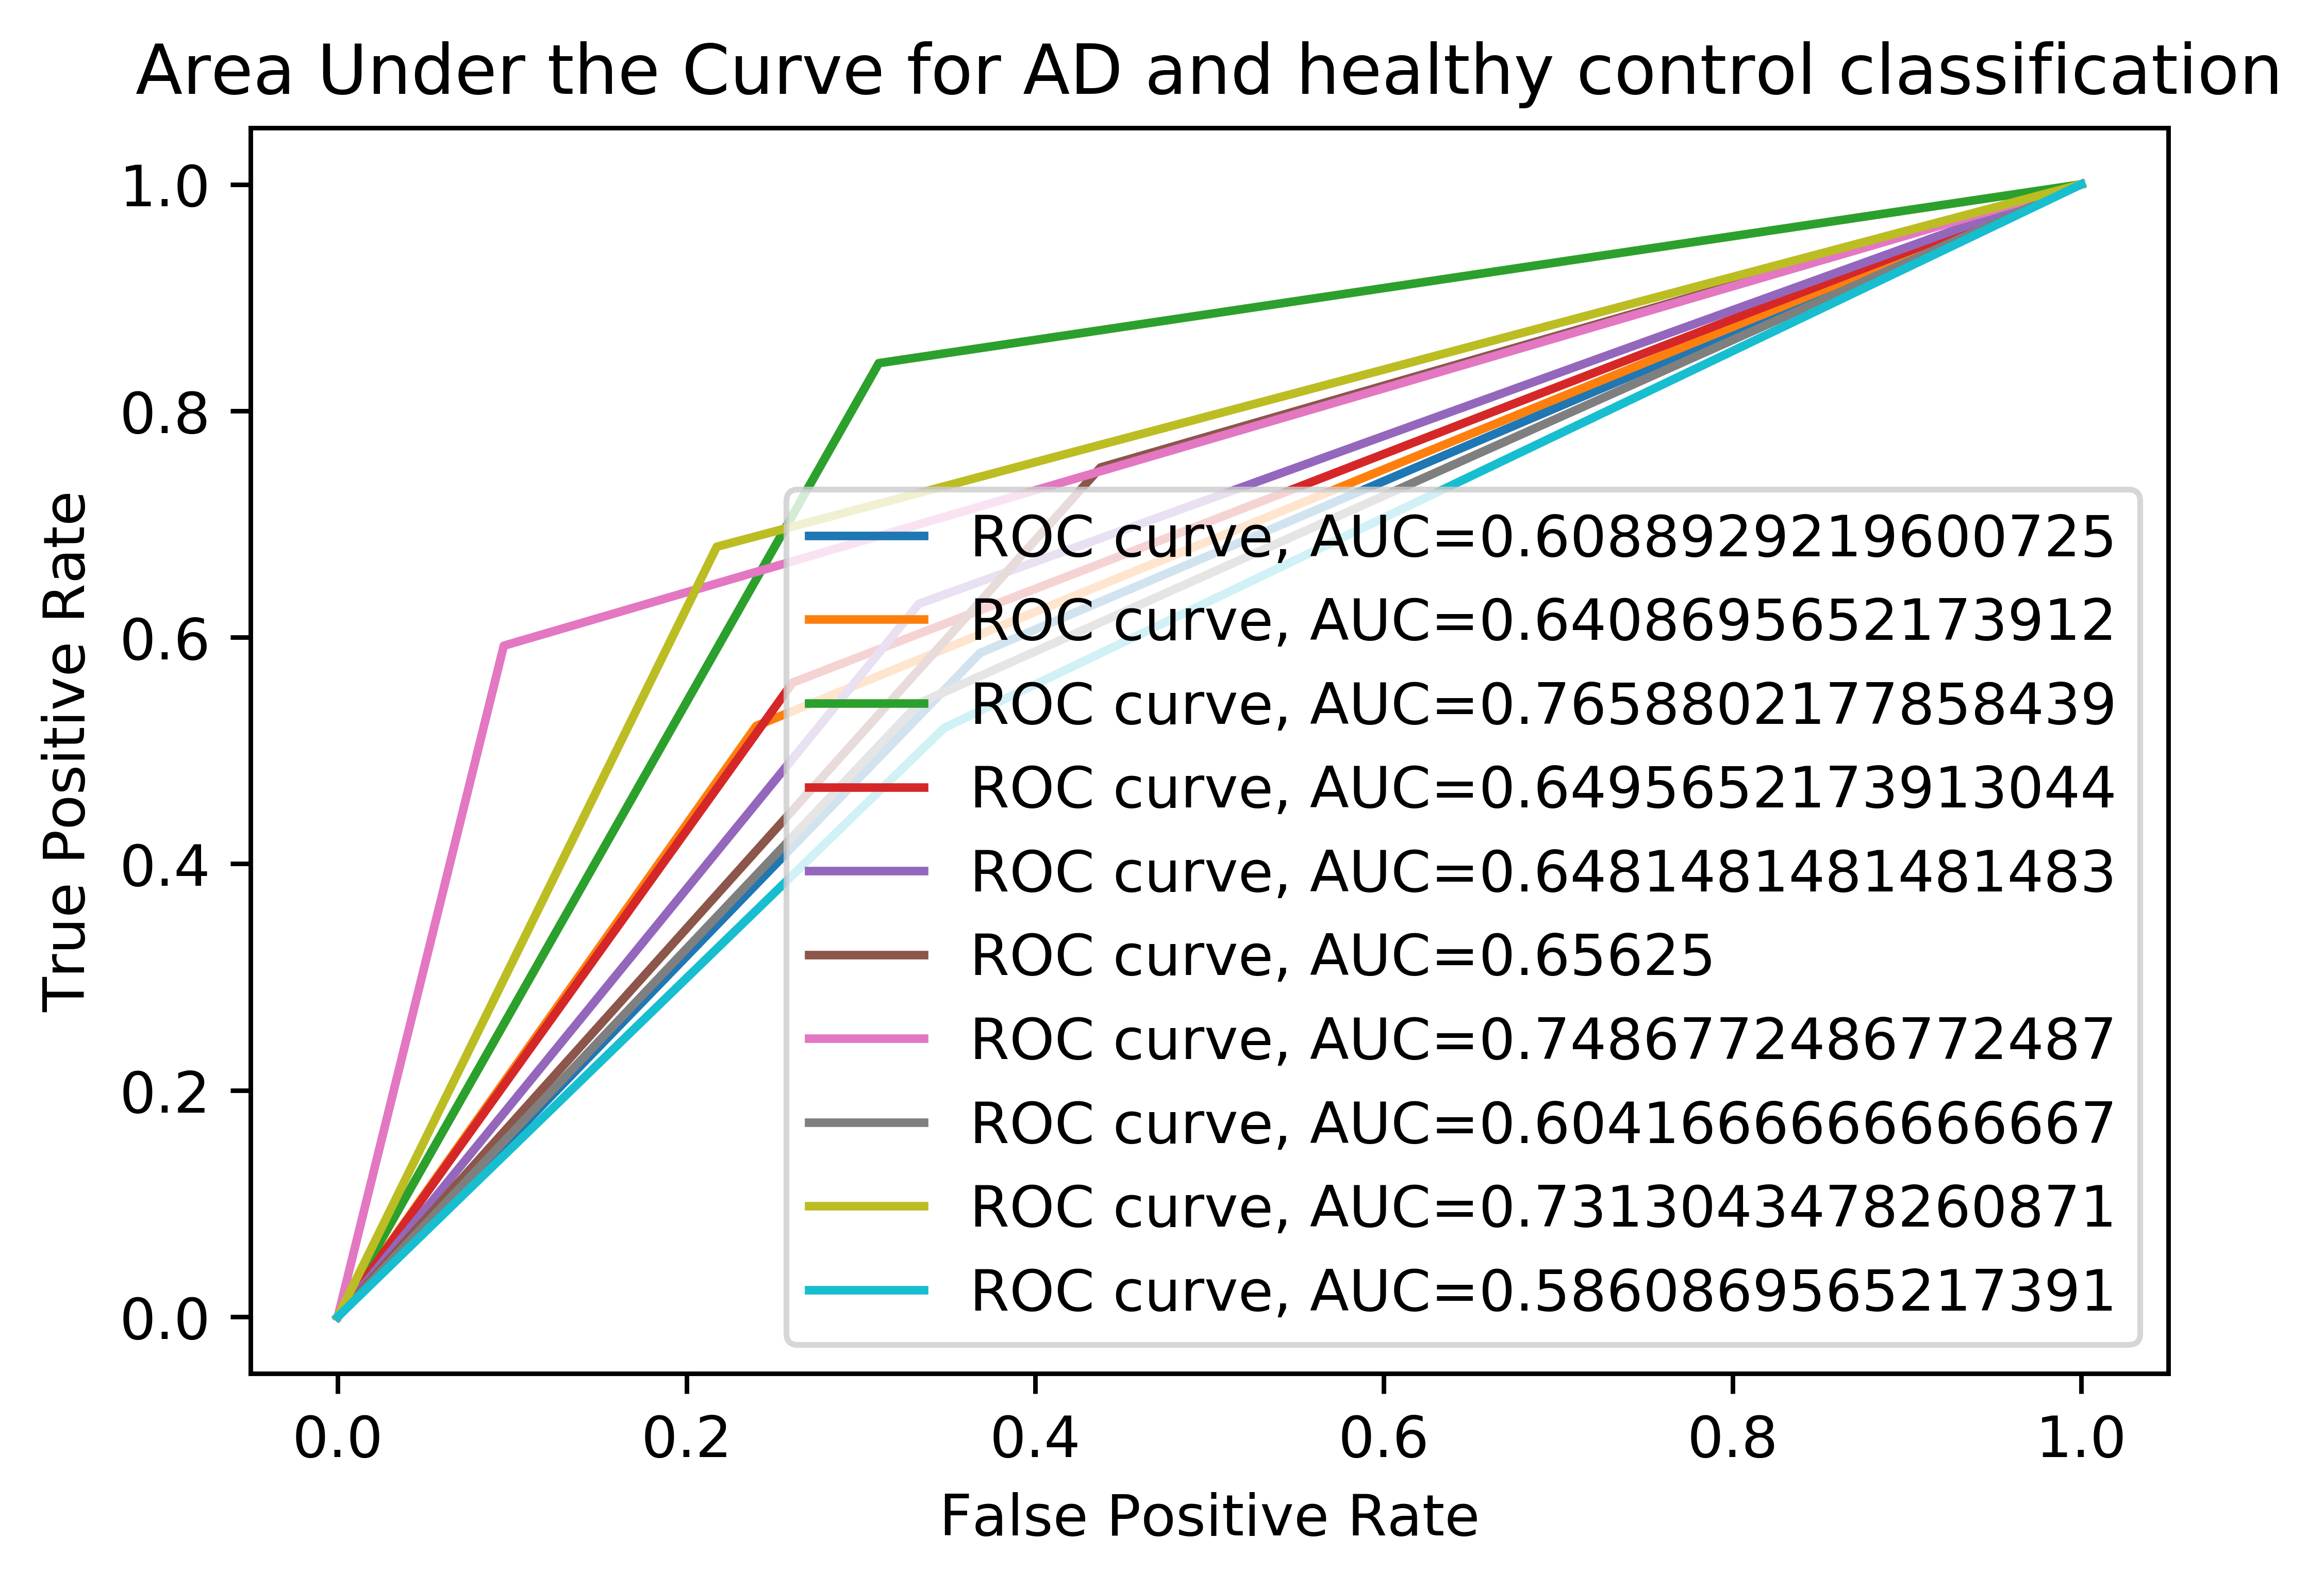

Test Accuracy: [0.6041666666666666, 0.6458333333333334, 0.75, 0.6458333333333334, 0.6458333333333334, 0.625, 0.7291666666666666, 0.6041666666666666, 0.7291666666666666, 0.5833333333333334]
Test Accuracy Mean: 0.65625
Test Accuracy Std: 0.05609546674098441


In [31]:
#train test split and its function with the parameter # of times you want to see the validation accuracy
#also prints out maximum accuracy and its corresponding c each term, mean, and standard deviation
target = [1 if i == 'ProbableAD' else 0 for i in y_list] #这里要写啥
def run_classification_model(num_of_runs, X, target): #the function returns a list of test accuracy
    test_accuracy = [] #the list of accuracy should be empty before each time the function runs
    auc_list = []
    plt.figure(dpi = 800)
    for i in range(num_of_runs): #for loop that runs exact number of times requested
        print("run " + str(i)) #print out which run it is
        validation_accuracy = [] #the list of validation accuracy, the max will be drawn from it at the end
        X_train, X_test, y_train, y_test = train_test_split( #get a test set of 10% of the data, and a train set of 90%
            X, target, test_size = 0.1
        )

        X_train, X_val, y_train, y_val = train_test_split( #get a train set of 80%, and a validation set of 10%
            X_train, y_train, train_size = 0.89
        )
        
#         c_list = [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10] #list of hyperparameters
#         for c in c_list: #test each c

#             lr = LogisticRegression(C=c) #imput the c
#             lr.fit(X_train, y_train) #fitting      

        clf = tree.DecisionTreeClassifier(criterion = 'gini')
        clf.fit(X_train, y_train)
        
        current_validation_accuracy = accuracy_score(y_val, clf.predict(X_val)) #calculate validation accuracy
        validation_accuracy.append(current_validation_accuracy) #append the list
            
        max_accuracy = max(validation_accuracy) #draw the maximum of validation accuracy
        index = np.argmax(validation_accuracy) #take the index of the maximum
#        c_optim = c_list[index] #take the corresponding c
#        print ("max validation accuracy is {} and optimal c is {}".format(max_accuracy, c_optim)) #print out the results
        
        # apply the best c to train the model
        clf_optim = tree.DecisionTreeClassifier(criterion = 'gini') #try the best c on test set
        clf_optim.fit(X_train, y_train) #fitting
        current_test_accuracy = accuracy_score(y_test, clf_optim.predict(X_test)) #calculate test accuracy
        test_accuracy.append(current_test_accuracy) #append test accuracy list
        
        #plot AUC
        y_pred_proba = clf_optim.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        auc_list.append(auc)
        plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))   

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under the Curve for AD and healthy control classification')
    plt.legend(loc=4)
    plt.savefig("doc2vec_roc.png", dpi = 800)
    plt.show()
    
    return test_accuracy, auc_list #return the list

test_accuracy, auc_list = run_classification_model(10, X.drop("category", axis=1), target) #call the function
mean_accuracy = np.mean(test_accuracy) #take the mean of test accuracy
std_accuracy = np.std(test_accuracy) #take standard deviation
print("Test Accuracy:",test_accuracy)
print("Test Accuracy Mean:",mean_accuracy)
print("Test Accuracy Std:",std_accuracy)

# Model Evaluation

In [32]:
print(np.mean(auc_list))
print(np.std(auc_list))

0.6639841290194501
0.05985120865805632


In [ ]:
#plot AUC
%matplotlib inline
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve for AD and healthy control classification')
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#rank the importance of features
print(lr.coef_)
print(lr.coef_.shape)
importance_rank = np.argsort(-abs(lr.coef_))
print(importance_rank[:10])

In [ ]:
#do we still need this?
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
    

    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)